In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.pyplot import figure

%matplotlib inline

In [6]:
# define path to store results

data_path = 'Dataset/DatasetB.avi'
# create directory to store results
!mkdir Results
!mkdir Results/Q3
!mkdir Results/Q3/partA
!mkdir Results/Q3/partB


pathA = "Results/Q3/partA/"
pathB = "Results/Q3/partB/"

mkdir: Results: File exists


# Part A

In [9]:
# function to compute and store histogram of an image
# input : img : image to compute histogram of
#.        plot_bool : True if you want to store and display histogram
#         save_path : path to save image at
#         frame_num : identifier of image
# returns : x and y for histogram

def ICV_img_histogram(img,plot_bool,save_path,frame_num):
    
    # array to store number of times a color appears in an image
    color_freq = np.zeros((256,3))
        
    # build and display histogram for R,G and B separately
    color_list = ['Red channel','Green channel','Blue channel']
    for rgb in range(3):
        
        img_to_consider = img[:,:,rgb]
        # go through each pixel in the image and 1 to color_freq for the color that appears
        for i in range(img_to_consider.shape[0]):
            for j in range(img_to_consider.shape[1]):
                color_freq[img_to_consider[i,j],rgb] = color_freq[img_to_consider[i,j],rgb] + 1
    
    x_Axis = np.arange(256).reshape(-1,1)
    if(plot_bool==True):
        # use pyplot.bar to make histogram
        fig = plt.figure(figsize=(15, 15), dpi=80)
        plt.bar(np.squeeze(x_Axis), color_freq[:,0], alpha = 0.33, color='red')
        plt.bar(np.squeeze(x_Axis), color_freq[:,1], alpha = 0.33, color='green')
        plt.bar(np.squeeze(x_Axis), color_freq[:,2], alpha = 0.33, color='blue')
        plt.xlabel("Intensity Bins")
        plt.ylabel("Number of pixels in bin")
        plt.title("Image color histogram of original image")
        fig.savefig(save_path+"Frame_"+str(frame_num)+".png")
        plt.show()
    
    return x_Axis,color_freq



In [7]:
# load image to test function
vidcap = cv2.VideoCapture(data_path)
success,image = vidcap.read()
# convert image in rgb format
# as opencv loads in BGR format by default, we want to show it in RGB.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

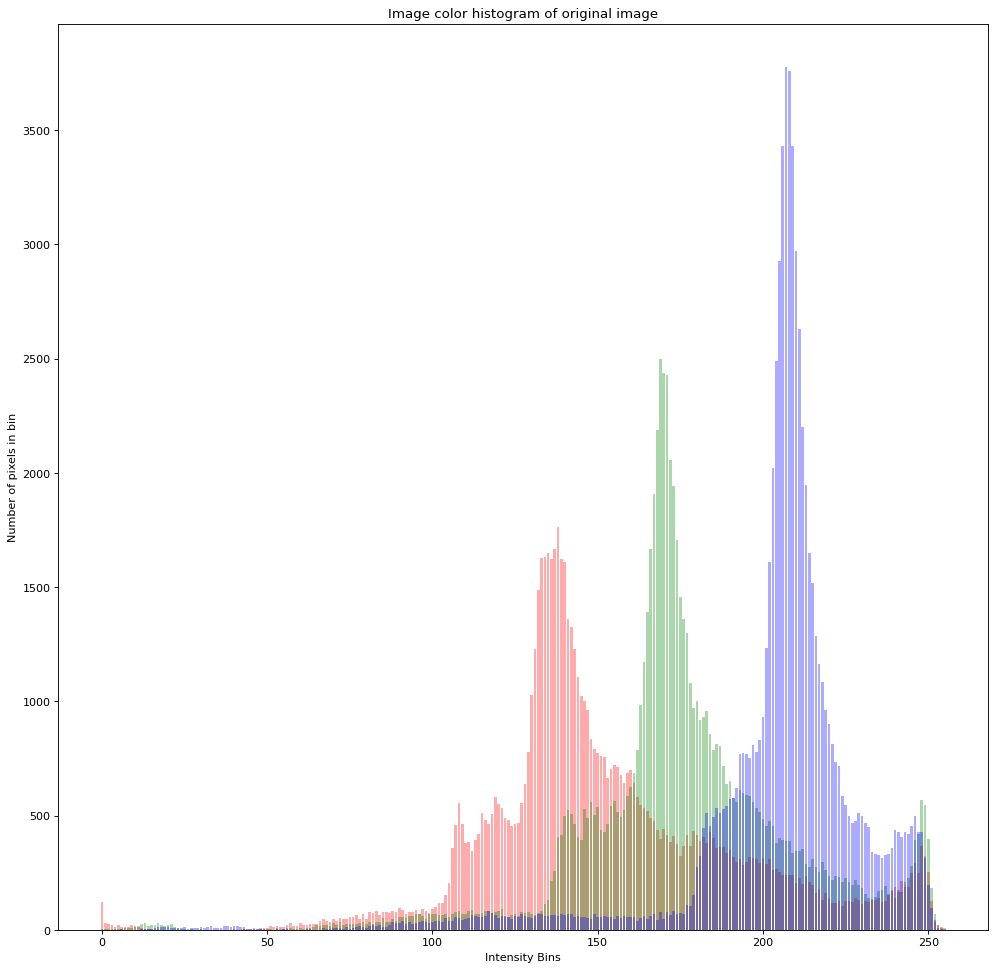

In [10]:
# use 1 bin per pixel value from 0 to 255
# pass False instead of True if you do not want images to be displayed
x_Axis,color_freq = ICV_img_histogram(image,True,pathA,'test')

Frame 0


KeyboardInterrupt: 

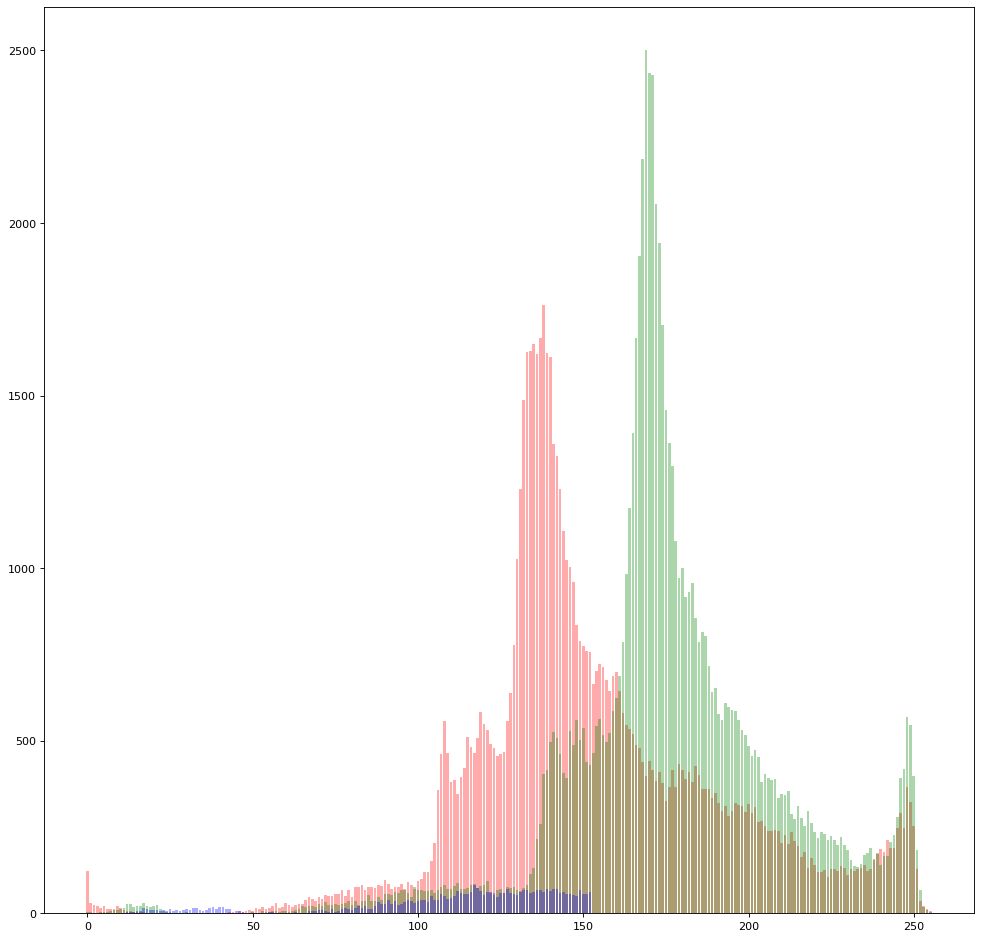

In [12]:
# go through frames in the vidoe and display histogram:

vidcap = cv2.VideoCapture(data_path)
i = 0
while(1):
    print("Frame", i)
    i = i + 1
    success,image = vidcap.read()
    
    # check if there are still frames left to process
    if(success==False):
        print("break")
        break
        
    # convert image in rgb format
    # as opencv loads in BGR format by default, we want to show it in RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    x_Axis,color_freq = ICV_img_histogram(image,True,pathA,i)
    

# Part B Intersection between histograms

In [14]:
# function to compute intersection between histograms
# input : x_Axis : index of array storing color frequencies, useful to plot histogram
#         color_freq_1 : color frequency in image 1
#         color_freq_2 : color frequency in image 2
#         plot_bool : True if you want to display image

# return : red_intersection : intersection in red channel
#          green_intersection : intersection in green channel
#          blue_intersection : intersection in blue channel

def ICV_hist_intersection(x_Axis,color_freq_1,color_freq_2,plot_bool):
    red_intersection = np.zeros((256))
    green_intersection = np.zeros((256))
    blue_intersection = np.zeros((256))
    
    for i in range(color_freq.shape[0]):
        red_intersection[i] = np.minimum(color_freq_1[i,0],color_freq_2[i,0])
        green_intersection[i] = np.minimum(color_freq_1[i,1],color_freq_2[i,1])
        blue_intersection[i] = np.minimum(color_freq_1[i,2],color_freq_2[i,2])

    x_Axis = np.arange(256).reshape(-1,1)
    if(plot_bool==True):
        # use pyplot.bar to make histogram
        fig = plt.figure(figsize=(15, 15), dpi=80)
        plt.bar(np.squeeze(x_Axis), red_intersection, alpha = 0.33, color='red')
        plt.bar(np.squeeze(x_Axis), green_intersection, alpha = 0.33, color='green')
        plt.bar(np.squeeze(x_Axis), blue_intersection, alpha = 0.33, color='blue')
        plt.xlabel("Intensity Bins")
        plt.ylabel("Number of pixels in bin")
        plt.title("Histogram intersection")
        plt.show()
    
    red_intersection = np.sum(red_intersection)
    green_intersection = np.sum(green_intersection)
    blue_intersection = np.sum(blue_intersection)
    
    return red_intersection,green_intersection,blue_intersection
    

# i) without normalization

In [15]:
# go through frames in the video and compute histogram intersection WITHOUT normalization:
vidcap = cv2.VideoCapture(data_path)
i = 0

# list to store intersection value for all frames
red_intersection_array = []
green_intersection_array = []
blue_intersection_array = []

# convert image in rgb format
# as opencv loads in BGR format by default, we want to show it in RGB.
success,old_image = vidcap.read()
old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)

while(1):
    print("Frame", i ,"and","Frame", i+1)
    i = i + 1
    success,new_image = vidcap.read()
    
    # check if all frames have been processed
    if(success==False):
        print("break")
        break
    
    # convert image in rgb format
    # as opencv loads in BGR format by default, we want to show it in RGB.
    new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    
#     plt.imshow(old_image)
#     plt.title("Frame t-1")
#     plt.show()
    
#     plt.imshow(new_image)
#     plt.title("Frame t")
#     plt.show()
    
    x_Axis,color_freq1 = ICV_img_histogram(old_image,False,'random','random')
    x_Axis,color_freq2 = ICV_img_histogram(new_image,False,'random','random')
    
    # get intersection values of frame i and frame i-1 histograms and store
    red_intersection,green_intersection,blue_intersection = ICV_hist_intersection(x_Axis,color_freq1,color_freq2,False)
    red_intersection_array.append(red_intersection)
    green_intersection_array.append(green_intersection)
    blue_intersection_array.append(blue_intersection)
    
    old_image = new_image


Frame 0 and Frame 1
Frame 1 and Frame 2
Frame 2 and Frame 3
Frame 3 and Frame 4
Frame 4 and Frame 5
Frame 5 and Frame 6
Frame 6 and Frame 7
Frame 7 and Frame 8
Frame 8 and Frame 9
Frame 9 and Frame 10
Frame 10 and Frame 11
Frame 11 and Frame 12
Frame 12 and Frame 13
Frame 13 and Frame 14
Frame 14 and Frame 15
Frame 15 and Frame 16
Frame 16 and Frame 17
Frame 17 and Frame 18
Frame 18 and Frame 19
Frame 19 and Frame 20
Frame 20 and Frame 21
Frame 21 and Frame 22
Frame 22 and Frame 23
Frame 23 and Frame 24
Frame 24 and Frame 25
Frame 25 and Frame 26
Frame 26 and Frame 27
Frame 27 and Frame 28
Frame 28 and Frame 29
Frame 29 and Frame 30
Frame 30 and Frame 31
Frame 31 and Frame 32
Frame 32 and Frame 33
Frame 33 and Frame 34
Frame 34 and Frame 35
Frame 35 and Frame 36
Frame 36 and Frame 37
Frame 37 and Frame 38
Frame 38 and Frame 39
Frame 39 and Frame 40
Frame 40 and Frame 41
Frame 41 and Frame 42
Frame 42 and Frame 43
Frame 43 and Frame 44
Frame 44 and Frame 45
Frame 45 and Frame 46
Frame 4

In [18]:
len(red_intersection_array)

347

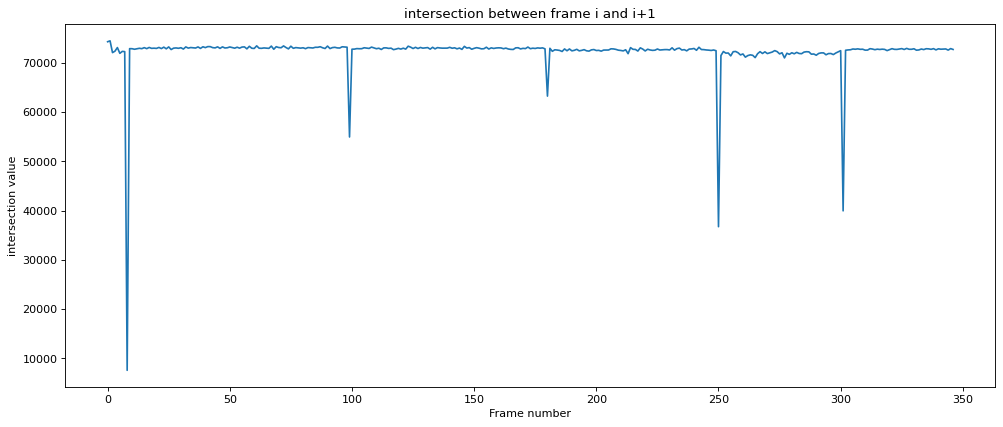

In [26]:
# plot and save intersection which is the mean of intersection of all 3 channels
fig = plt.figure(figsize=(15, 6), dpi=80)
plt.plot((np.array(red_intersection_array)+np.array(green_intersection_array)+np.array(blue_intersection_array))/3)
plt.xlabel("Frame number")
plt.ylabel("intersection value")
plt.title("intersection between frame i and i+1")
fig.savefig(pathB+"intersection_without_norm.png")

# Intersection between histograms after normalization

In [23]:
# go through frames in the vidoe and compute histogram intersection between frame i and frame i-1
vidcap = cv2.VideoCapture(data_path)
i = 0

# to store intersection value along channels for all frames
red_intersection_array_norm = []
green_intersection_array_norm = []
blue_intersection_array_norm = []

# convert image in rgb format
# as opencv loads in BGR format by default, we want to show it in RGB.
success,old_image = vidcap.read()
old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)

while(1):
    print("Frame", i ,"and","Frame", i+1)
    i = i + 1
    success,new_image = vidcap.read()
    
    # chekc if all frames have been processed
    if(success==False):
        print("break")
        break
    
    # convert image in rgb format
    # as opencv loads in BGR format by default, we want to show it in RGB.
    new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    
    # get histogram
    x_Axis,color_freq1 = ICV_img_histogram(old_image,False,'random','random')
    x_Axis,color_freq2 = ICV_img_histogram(new_image,False,'random','random')

    # normalize frequency of color occurance
    color_freq1 = color_freq1/np.sum(color_freq1,0)
    color_freq2 = color_freq2/np.sum(color_freq2,0)
    
    red_intersection,green_intersection,blue_intersection = ICV_hist_intersection(x_Axis,color_freq1,color_freq2,False)
    red_intersection_array_norm.append(red_intersection)
    green_intersection_array_norm.append(green_intersection)
    blue_intersection_array_norm.append(blue_intersection)
    
    old_image = new_image


Frame 0 and Frame 1
Frame 1 and Frame 2
Frame 2 and Frame 3
Frame 3 and Frame 4
Frame 4 and Frame 5
Frame 5 and Frame 6
Frame 6 and Frame 7
Frame 7 and Frame 8
Frame 8 and Frame 9
Frame 9 and Frame 10
Frame 10 and Frame 11
Frame 11 and Frame 12
Frame 12 and Frame 13
Frame 13 and Frame 14
Frame 14 and Frame 15
Frame 15 and Frame 16
Frame 16 and Frame 17
Frame 17 and Frame 18
Frame 18 and Frame 19
Frame 19 and Frame 20
Frame 20 and Frame 21
Frame 21 and Frame 22
Frame 22 and Frame 23
Frame 23 and Frame 24
Frame 24 and Frame 25
Frame 25 and Frame 26
Frame 26 and Frame 27
Frame 27 and Frame 28
Frame 28 and Frame 29
Frame 29 and Frame 30
Frame 30 and Frame 31
Frame 31 and Frame 32
Frame 32 and Frame 33
Frame 33 and Frame 34
Frame 34 and Frame 35
Frame 35 and Frame 36
Frame 36 and Frame 37
Frame 37 and Frame 38
Frame 38 and Frame 39
Frame 39 and Frame 40
Frame 40 and Frame 41
Frame 41 and Frame 42
Frame 42 and Frame 43
Frame 43 and Frame 44
Frame 44 and Frame 45
Frame 45 and Frame 46
Frame 4

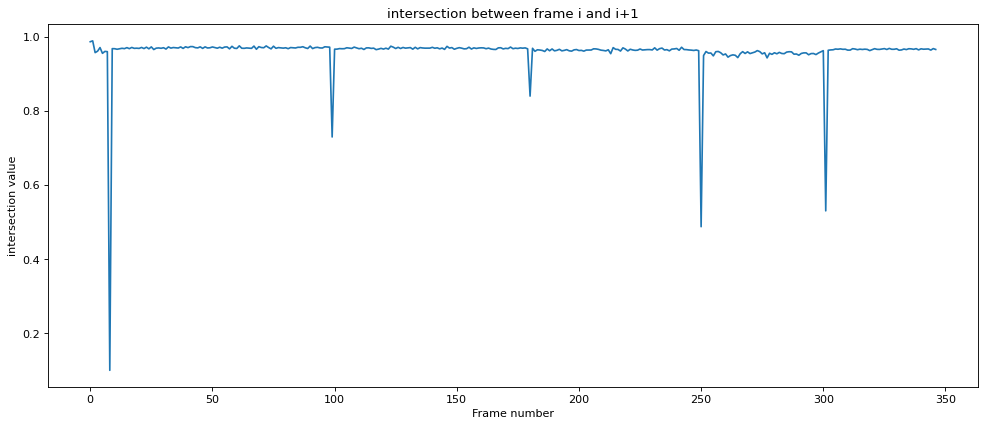

In [25]:
# display similarities between consecutive frames
fig = plt.figure(figsize=(15, 6), dpi=80)
plt.plot((np.array(red_intersection_array_norm)+np.array(green_intersection_array_norm)+np.array(blue_intersection_array_norm))/3)
plt.xlabel("Frame number")
plt.ylabel("intersection value")
plt.title("intersection between frame i and i+1")
fig.savefig(pathB+"intersection_with_norm.png")